# エアコン最適化システム - ステップ別テスト

このnotebookでは、前処理から計画策定までのプロセスを1つずつ確認できます。


In [1]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aircon_optimizer import AirconOptimizer

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")

print("📚 ライブラリ読み込み完了")


📚 ライブラリ読み込み完了


## システム初期化

Cleaの最適化システムを初期化します。前処理はスキップして、最適化に集中します。


In [2]:
# Cleaの最適化システム初期化（前処理をスキップ）
optimizer = AirconOptimizer("Clea", enable_preprocessing=False)
print(f"🏢 {optimizer.store_name}の最適化システム初期化完了")
print(f"前処理フラグ: {optimizer.enable_preprocessing}")


🏢 Cleaの最適化システム初期化完了
前処理フラグ: False


## STEP 1: データ前処理（スキップ）

Cleaでは前処理をスキップし、既存の前処理済みデータを読み込みます。


In [3]:
print("=" * 60)
print("🔧 STEP 1: データ前処理（スキップ）")
print("=" * 60)

# 既存の前処理済みデータを読み込み
ac_control_df, power_meter_df = optimizer._load_existing_processed_data()

print(f"\n📊 データ概要:")
if ac_control_df is not None:
    print(f"   AC制御データ: {len(ac_control_df):,}件")
    print(f"   列: {list(ac_control_df.columns)}")
    print(f"   期間: {ac_control_df['date'].min()} ～ {ac_control_df['date'].max()}")
else:
    print("   AC制御データ: なし")

if power_meter_df is not None:
    print(f"   電力メーターデータ: {len(power_meter_df):,}件")
    print(f"   列: {list(power_meter_df.columns)}")
    print(f"   期間: {power_meter_df['date'].min()} ～ {power_meter_df['date'].max()}")
else:
    print("   電力メーターデータ: なし")


🔧 STEP 1: データ前処理（スキップ）
📁 Cleaの既存前処理済みデータ読み込み中...
   ✅ AC制御データ読み込み: 3,309,404件
   ✅ 電力メーターデータ読み込み: 2,452,932件

📊 データ概要:
   AC制御データ: 3,309,404件
   列: ['A/C Name', 'Datetime', 'Outdoor Temp.', 'Indoor Temp.', 'A/C Set Temperature', 'A/C ON/OFF', 'A/C Mode', 'A/C Fan Speed', 'Naive Energy Level', 'Airux Energy Level', 'Outdoor Room Temp.', 'Outdoor Set Temp.', 'Room Set Temp.', 'date', 'datetime']
   期間: 2024-06-30 ～ 2025-09-28
   電力メーターデータ: 2,452,932件
   列: ['Mesh ID', 'PM Addr ID', 'Datetime', 'Phase A', 'Phase B', 'Phase C', '機器番号', '電力', 'date', 'datetime']
   期間: 2024-06-30 ～ 2025-09-28


## STEP 2: マスタデータ読み込み


In [4]:
print("=" * 60)
print("📋 STEP 2: マスタデータ読み込み")
print("=" * 60)

# マスタデータ読み込み
master_info = optimizer.feature_engineer.load_master_data()

if master_info:
    print(f"✅ マスタデータ読み込み完了")
    print(f"   制御区分数: {len(master_info.get('zones', {}))}")
    
    # 制御区分の詳細表示
    zones = master_info.get('zones', {})
    for zone_name, zone_info in zones.items():
        print(f"   📍 {zone_name}:")
        print(f"      営業時間: {zone_info.get('start_time', 'N/A')} - {zone_info.get('end_time', 'N/A')}")
        print(f"      目標温度: {zone_info.get('target_room_temp', 'N/A')}°C")
        print(f"      温度範囲: {zone_info.get('setpoint_min', 'N/A')}°C - {zone_info.get('setpoint_max', 'N/A')}°C")
        
        # 室外機情報
        outdoor_units = zone_info.get('outdoor_units', {})
        print(f"      室外機数: {len(outdoor_units)}")
        for outdoor_id, outdoor_info in outdoor_units.items():
            indoor_units = outdoor_info.get('indoor_units', [])
            print(f"        {outdoor_id}: {len(indoor_units)}台の室内機")
else:
    print("❌ マスタデータ読み込み失敗")

# check_
master_info

📋 STEP 2: マスタデータ読み込み
📋 Cleaのマスタデータ読み込み中...
   ✅ JSONマスタデータ読み込み完了: ['zones']
✅ マスタデータ読み込み完了
   制御区分数: 6
   📍 Area 1:
      営業時間: 07:30 - 20:00
      目標温度: 22.5°C
      温度範囲: 19.0°C - 26.0°C
      室外機数: 7
        49-1: 1台の室内機
        49-2: 1台の室内機
        49-3: 1台の室内機
        49-4: 2台の室内機
        49-6: 1台の室内機
        49-7: 1台の室内機
        49-8: 1台の室内機
   📍 Area 2:
      営業時間: 07:00 - 20:00
      目標温度: 23.0°C
      温度範囲: 20.0°C - 26.0°C
      室外機数: 6
        43-1: 1台の室内機
        43-2: 1台の室内機
        43-3: 1台の室内機
        43-4: 1台の室内機
        44-1: 1台の室内機
        44-3: 1台の室内機
   📍 Area 3:
      営業時間: 07:30 - 20:00
      目標温度: 23.5°C
      温度範囲: 20.0°C - 27.0°C
      室外機数: 1
        49-9: 2台の室内機
   📍 Area 4:
      営業時間: 06:30 - 20:00
      目標温度: 24.5°C
      温度範囲: 23.0°C - 26.0°C
      室外機数: 2
        44-2: 1台の室内機
        44-4: 2台の室内機
   📍 Meeting Room:
      営業時間: 07:00 - 20:00
      目標温度: 23.0°C
      温度範囲: 20.0°C - 26.0°C
      室外機数: 1
        44-8: 2台の室内機
   📍 Break Room:
      営業時間: 07:00

{'zones': {'Area 1': {'start_time': '07:30',
   'end_time': '20:00',
   'spot': False,
   'target_room_temp': 22.5,
   'setpoint_min': 19.0,
   'setpoint_max': 26.0,
   'fan_candidates': ['Low', 'Medium', 'High'],
   'outdoor_units': {'49-1': {'load_share': 1.0, 'indoor_units': ['E-16北4']},
    '49-2': {'load_share': 1.0, 'indoor_units': ['E-15北3']},
    '49-3': {'load_share': 1.0, 'indoor_units': ['E-12南4']},
    '49-4': {'load_share': 1.0, 'indoor_units': ['E-11南3', 'E-14北2']},
    '49-6': {'load_share': 1.0, 'indoor_units': ['E-13北1']},
    '49-7': {'load_share': 1.0, 'indoor_units': ['E-10南2']},
    '49-8': {'load_share': 1.0, 'indoor_units': ['E-9南1']}}},
  'Area 2': {'start_time': '07:00',
   'end_time': '20:00',
   'spot': False,
   'target_room_temp': 23.0,
   'setpoint_min': 20.0,
   'setpoint_max': 26.0,
   'fan_candidates': ['Low', 'Medium', 'High'],
   'outdoor_units': {'43-1': {'load_share': 1.0, 'indoor_units': ['D-8北2']},
    '43-2': {'load_share': 1.0, 'indoor_units': [

In [5]:
ac_control_df.head()

,A/C Name,Datetime,Outdoor Temp.,Indoor Temp.,A/C Set Temperature,A/C ON/OFF,A/C Mode,A/C Fan Speed,Naive Energy Level,Airux Energy Level,...,機器番号,設定温度,室内温度,外気温度,運転,モード,風量,外気湿度,date,datetime
0,G-24,2025-04-30 14:55:00,6.0,16.0,26.0,OFF,COOL,NaN,0,0,...,G-24,26.0,16.0,6.0,0,0,-1,50,2025-04-30,2025-04-30 14:55:00
1,G-21,2025-04-30 14:55:00,6.0,20.0,26.0,OFF,COOL,NaN,0,0,...,G-21,26.0,20.0,6.0,0,0,-1,50,2025-04-30,2025-04-30 14:55:00
2,G-23,2025-04-30 14:55:00,6.0,16.0,22.0,OFF,HEAT,NaN,0,0,...,G-23,22.0,16.0,6.0,0,2,-1,50,2025-04-30,2025-04-30 14:55:00
3,G-22,2025-04-30 14:55:00,6.0,18.0,22.0,ON,HEAT,Medium,100,100,...,G-22,22.0,18.0,6.0,1,2,3,50,2025-04-30,2025-04-30 14:55:00
4,G-23,2025-04-30 14:50:00,6.0,16.0,22.0,OFF,HEAT,NaN,0,0,...,G-23,22.0,16.0,6.0,0,2,-1,50,2025-04-30,2025-04-30 14:50:00


In [6]:
power_meter_df.head()

,Mesh ID,PM Addr ID,Datetime,Phase A,Phase B,Phase C,機器番号,電力,date,datetime
0,44,2,2025-05-31 14:59:00,10,0,0,44,10,2025-05-31,2025-05-31 14:59:00
1,49,9,2025-05-31 14:59:00,75,0,0,49,75,2025-05-31,2025-05-31 14:59:00
2,41,1,2025-05-31 14:59:00,2,0,0,41,2,2025-05-31,2025-05-31 14:59:00
3,43,4,2025-05-31 14:59:00,65,0,0,43,65,2025-05-31,2025-05-31 14:59:00
4,44,4,2025-05-31 14:58:00,45,0,0,44,45,2025-05-31,2025-05-31 14:58:00


## STEP 3: 特徴量作成


In [8]:
print("=" * 60)
print("🔧 STEP 3: 特徴量作成")
print("=" * 60)

# 特徴量作成
feature_df = optimizer.feature_engineer.create_features(
    ac_control_df, power_meter_df, master_info
)

if feature_df is not None:
    print(f"✅ 特徴量作成完了: {len(feature_df):,}件")
    print(f"   列数: {len(feature_df.columns)}")
    print(f"   期間: {feature_df['date'].min()} ～ {feature_df['date'].max()}")
    
    # 特徴量の基本統計
    print(f"\n📊 特徴量の基本統計:")
    numeric_cols = feature_df.select_dtypes(include=[np.number]).columns
    print(feature_df[numeric_cols].describe())
    
    # 欠損値チェック
    missing_data = feature_df.isnull().sum()
    if missing_data.sum() > 0:
        print(f"\n⚠️ 欠損値:")
        print(missing_data[missing_data > 0])
    else:
        print(f"\n✅ 欠損値なし")
else:
    print("❌ 特徴量作成失敗")


🔧 STEP 3: 特徴量作成
🔧 特徴量作成中...


   ⚠️ 電力データの統合に失敗しました
   ✅ 特徴量作成完了: 3,309,276件
✅ 特徴量作成完了: 3,309,276件
   列数: 10


KeyError: 'date'

## STEP 4: モデル訓練


In [ ]:
print("=" * 60)
print("🤖 STEP 4: モデル訓練")
print("=" * 60)

# 環境予測モデル訓練
print("🌡️ 環境予測モデル訓練中...")
env_models = optimizer.model_trainer.train_environmental_model(
    feature_df, master_info
)

if env_models:
    print(f"✅ 環境予測モデル訓練完了: {len(env_models)}個のモデル")
    for model_name, model_info in env_models.items():
        if not model_info.get('is_default', False):
            print(f"   📊 {model_name}: MAE={model_info.get('temp_mae', 'N/A'):.2f}, R²={model_info.get('temp_r2', 'N/A'):.3f}")
else:
    print("❌ 環境予測モデル訓練失敗")

print("\n" + "-" * 40)

# 電力予測モデル訓練
print("⚡ 電力予測モデル訓練中...")
power_models = optimizer.model_trainer.train_power_model(
    feature_df, master_info
)

if power_models:
    print(f"✅ 電力予測モデル訓練完了: {len(power_models)}個のモデル")
    for model_name, model_info in power_models.items():
        if not model_info.get('is_default', False):
            print(f"   📊 {model_name}: MAE={model_info.get('mae', 'N/A'):.2f}, R²={model_info.get('r2', 'N/A'):.3f}")
else:
    print("❌ 電力予測モデル訓練失敗")


🤖 STEP 4: モデル訓練
🌡️ 環境予測モデル訓練中...
🌡️ 環境予測モデル訓練中...
   🔍 Area 1 の環境予測モデル学習中...
   ✅ Area 1: 3600件のデータを取得
   ✅ Area 1: 温度 MAE=0.83, R²=0.932, MAPE=3.8%
   ✅ Area 1: 湿度 MAE=0.00, R²=1.000, MAPE=0.0%
   🔍 Area 2 の環境予測モデル学習中...
   ✅ Area 2: 2718件のデータを取得
   ✅ Area 2: 温度 MAE=0.83, R²=0.922, MAPE=3.4%
   ✅ Area 2: 湿度 MAE=0.00, R²=1.000, MAPE=0.0%
   🔍 Area 3 の環境予測モデル学習中...
   ✅ Area 3: 900件のデータを取得
   ✅ Area 3: 温度 MAE=0.66, R²=0.968, MAPE=3.1%
   ✅ Area 3: 湿度 MAE=0.00, R²=1.000, MAPE=0.0%
   🔍 Area 4 の環境予測モデル学習中...
   ✅ Area 4: 1368件のデータを取得
   ✅ Area 4: 温度 MAE=0.61, R²=0.973, MAPE=2.5%
   ✅ Area 4: 湿度 MAE=0.00, R²=1.000, MAPE=0.0%
   🔍 Meeting Room の環境予測モデル学習中...
   ✅ Meeting Room: 910件のデータを取得
   ✅ Meeting Room: 温度 MAE=1.17, R²=0.963, MAPE=5.5%
   ✅ Meeting Room: 湿度 MAE=0.00, R²=1.000, MAPE=0.0%
   🔍 Break Room の環境予測モデル学習中...
   ✅ Break Room: 910件のデータを取得
   ✅ Break Room: 温度 MAE=0.79, R²=0.950, MAPE=3.7%
   ✅ Break Room: 湿度 MAE=0.00, R²=1.000, MAPE=0.0%
✅ 環境予測モデル訓練完了: 6個のモデル
   📊 Area 1: MAE=0.83

## STEP 5: 最適化実行


In [ ]:
print("=" * 60)
print("🎯 STEP 5: 最適化実行")
print("=" * 60)

# 最適化実行
optimization_results = optimizer.optimizer.optimize_control_values(master_info)

if optimization_results:
    print(f"✅ 最適化実行完了: {len(optimization_results)}個の制御区分")
    
    # 最適化結果の概要
    for zone_name, zone_schedule in optimization_results.items():
        if isinstance(zone_schedule, dict) and zone_schedule:
            print(f"   📍 {zone_name}: {len(zone_schedule)}時間分のスケジュール")
            
            # 最初の数時間の結果を表示
            sample_times = list(zone_schedule.keys())[:3]
            for time_key in sample_times:
                control_data = zone_schedule[time_key]
                if isinstance(control_data, dict):
                    print(f"     {time_key}: 温度={control_data.get('設定温度', 'N/A')}°C, モード={control_data.get('モード', 'N/A')}")
else:
    print("❌ 最適化実行失敗")


🎯 STEP 5: 最適化実行
🎯 2日サイクル制御値最適化中...
🌤️ 天気予報データ取得中...
   ✅ 天気予報データ取得完了: 72件
🔄 2日サイクル最適化実行中...
   🔍 Area 1 の2日サイクル最適化中...
   🔍 制御値候補: 温度=[19, 20, 21, 22, 23, 24, 25, 26], モード=[0, 1, 2], 風量=[1, 2, 3]
   🔍 営業時間: 07:30-20:00
   🎯 最適解更新: 温度=19°C, モード=0, 風量=1, スコア=0.00
   🔍 制御値候補: 温度=[19, 20, 21, 22, 23, 24, 25, 26], モード=[0, 1, 2], 風量=[1, 2, 3]
   🔍 営業時間: 07:30-20:00
   🎯 最適解更新: 温度=19°C, モード=0, 風量=1, スコア=0.00
   🔍 制御値候補: 温度=[19, 20, 21, 22, 23, 24, 25, 26], モード=[0, 1, 2], 風量=[1, 2, 3]
   🔍 営業時間: 07:30-20:00
   🎯 最適解更新: 温度=19°C, モード=0, 風量=1, スコア=0.00
   🔍 制御値候補: 温度=[19, 20, 21, 22, 23, 24, 25, 26], モード=[0, 1, 2], 風量=[1, 2, 3]
   🔍 営業時間: 07:30-20:00
   🎯 最適解更新: 温度=19°C, モード=0, 風量=1, スコア=0.00
   🔍 制御値候補: 温度=[19, 20, 21, 22, 23, 24, 25, 26], モード=[0, 1, 2], 風量=[1, 2, 3]
   🔍 営業時間: 07:30-20:00
   🎯 最適解更新: 温度=19°C, モード=0, 風量=1, スコア=0.00
   🔍 制御値候補: 温度=[19, 20, 21, 22, 23, 24, 25, 26], モード=[0, 1, 2], 風量=[1, 2, 3]
   🔍 営業時間: 07:30-20:00
   🎯 最適解更新: 温度=19°C, モード=0, 風量=1, スコア=0.00
   🔍 制御値候補: 温度=[19, 20,

## STEP 6: スケジュール生成


In [ ]:
print("=" * 60)
print("📅 STEP 6: スケジュール生成")
print("=" * 60)

# スケジュール生成
output_dir = f"planning/{optimizer.store_name}"
import os
os.makedirs(output_dir, exist_ok=True)

optimizer.optimizer.generate_hourly_control_schedule(
    optimization_results, master_info, output_dir
)

print(f"✅ スケジュール生成完了")
print(f"📁 出力ディレクトリ: {output_dir}")

# 生成されたファイルの確認
import glob
generated_files = glob.glob(f"{output_dir}/*.csv")
if generated_files:
    print(f"\n📄 生成されたファイル:")
    for file_path in generated_files:
        file_size = os.path.getsize(file_path)
        print(f"   📄 {os.path.basename(file_path)} ({file_size:,} bytes)")
        
        # ファイルの内容を少し表示
        df = pd.read_csv(file_path)
        print(f"      行数: {len(df)}, 列数: {len(df.columns)}")
        print(f"      期間: {df.iloc[0, 0]} ～ {df.iloc[-1, 0]}")
else:
    print("❌ スケジュールファイルが生成されませんでした")


📅 STEP 6: スケジュール生成
📅 時刻別制御スケジュール生成中...
   📅 対象日: 2025-09-28
   📋 制御区分: Area 1 -> 室内機: E-16北4
   📋 制御区分: Area 1 -> 室内機: E-15北3
   📋 制御区分: Area 1 -> 室内機: E-12南4
   📋 制御区分: Area 1 -> 室内機: E-11南3
   📋 制御区分: Area 1 -> 室内機: E-14北2
   📋 制御区分: Area 1 -> 室内機: E-13北1
   📋 制御区分: Area 1 -> 室内機: E-10南2
   📋 制御区分: Area 1 -> 室内機: E-9南1
   📋 制御区分: Area 2 -> 室内機: D-8北2
   📋 制御区分: Area 2 -> 室内機: D-6北1
   📋 制御区分: Area 2 -> 室内機: D-7南2
   📋 制御区分: Area 2 -> 室内機: D-5南1
   📋 制御区分: Area 2 -> 室内機: D-4北2
   📋 制御区分: Area 2 -> 室内機: D-2北1
   📋 制御区分: Area 3 -> 室内機: E-17
   📋 制御区分: Area 3 -> 室内機: A-26
   📋 制御区分: Area 4 -> 室内機: F-18
   📋 制御区分: Area 4 -> 室内機: F-19
   📋 制御区分: Area 4 -> 室内機: F-20
   📋 制御区分: Meeting Room -> 室内機: G-24
   📋 制御区分: Meeting Room -> 室内機: G-23
   📋 制御区分: Break Room -> 室内機: G-21
   📋 制御区分: Break Room -> 室内機: G-22
   🔍 制御区分処理: Area 1 -> E-16北4 (ID: E-16北4)
   ✅ 制御区分追加: Area 1 -> E-16北4
   🔍 制御区分処理: Area 1 -> E-15北3 (ID: E-15北3)
   ✅ 制御区分追加: Area 1 -> E-15北3
   🔍 制御区分処理: Area 1 -> E-12南4 (ID: E-12南

## 結果の可視化


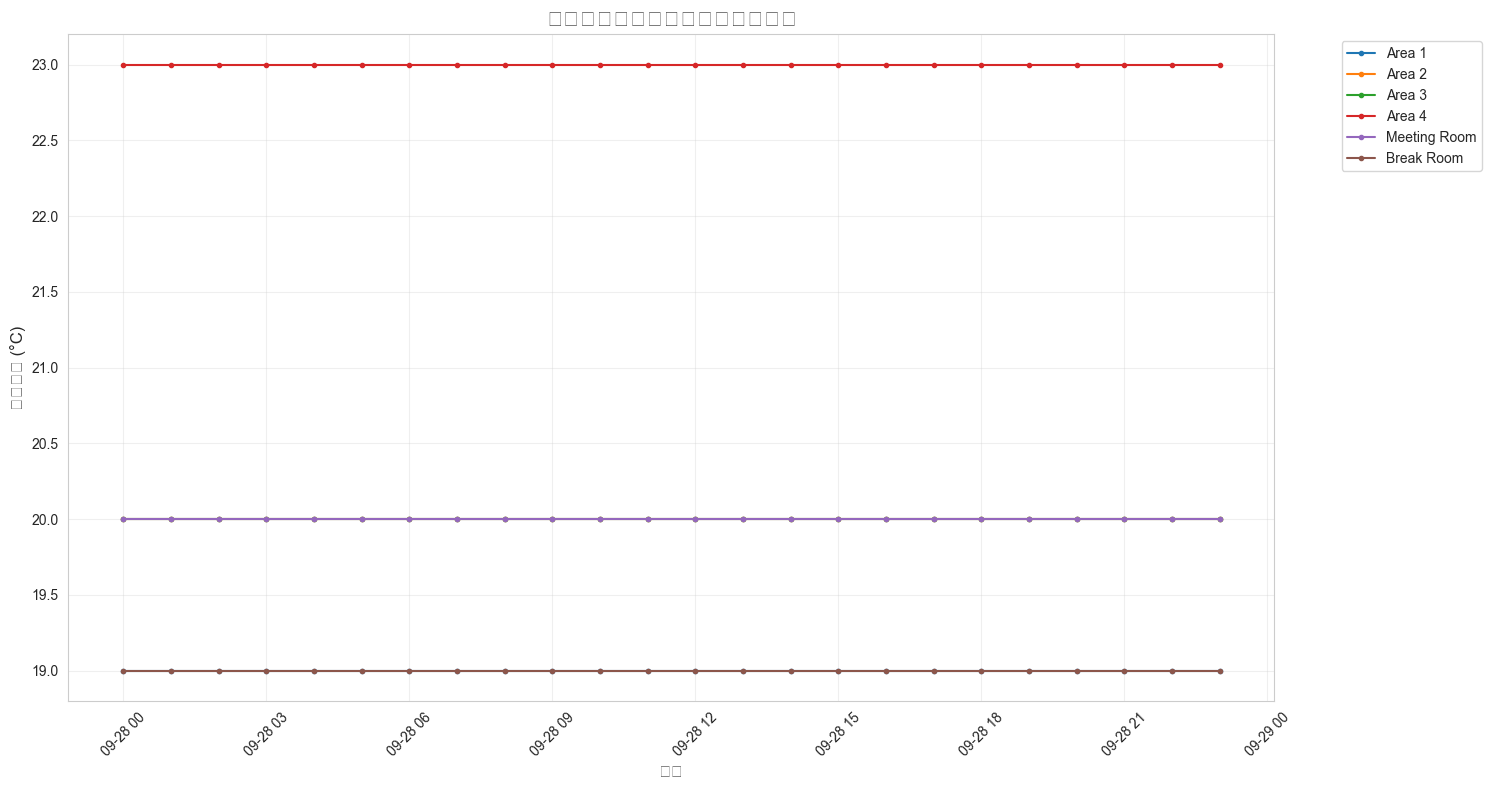

✅ 制御区分別スケジュール可視化完了
   対象期間: 2025-09-28 00:00:00 ～ 2025-09-28 23:00:00
   制御区分数: 6


In [ ]:
# 制御区分別スケジュールの可視化
control_schedule_file = f"planning/{optimizer.store_name}/control_type_schedule_*.csv"
control_files = glob.glob(control_schedule_file)

if control_files:
    df_control = pd.read_csv(control_files[0])
    
    # 時間列を変換
    df_control['datetime'] = pd.to_datetime(df_control['Date Time'])
    
    # 制御区分ごとの設定温度を可視化
    temp_cols = [col for col in df_control.columns if 'SetTemp' in col]
    
    if temp_cols:
        plt.figure(figsize=(15, 8))
        for col in temp_cols:
            zone_name = col.replace('_SetTemp', '')
            plt.plot(df_control['datetime'], df_control[col], label=zone_name, marker='o', markersize=3)
        
        plt.title('制御区分別設定温度スケジュール', fontsize=16)
        plt.xlabel('時間', fontsize=12)
        plt.ylabel('設定温度 (°C)', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print(f"✅ 制御区分別スケジュール可視化完了")
        print(f"   対象期間: {df_control['datetime'].min()} ～ {df_control['datetime'].max()}")
        print(f"   制御区分数: {len(temp_cols)}")
else:
    print("❌ 制御区分スケジュールファイルが見つかりません")


## まとめ


In [ ]:
print("=" * 60)
print("🎉 最適化プロセス完了")
print("=" * 60)

print(f"✅ ストア: {optimizer.store_name}")
print(f"✅ 前処理: {'実行' if optimizer.enable_preprocessing else 'スキップ'}")
print(f"✅ 特徴量: {len(feature_df):,}件" if feature_df is not None else "❌ 特徴量: 失敗")
print(f"✅ 環境モデル: {len(env_models)}個" if env_models else "❌ 環境モデル: 失敗")
print(f"✅ 電力モデル: {len(power_models)}個" if power_models else "❌ 電力モデル: 失敗")
print(f"✅ 最適化: {len(optimization_results)}個の制御区分" if optimization_results else "❌ 最適化: 失敗")
print(f"✅ スケジュール: {len(generated_files)}個のファイル" if 'generated_files' in locals() else "❌ スケジュール: 失敗")

print(f"\n📁 出力ファイル:")
if 'generated_files' in locals() and generated_files:
    for file_path in generated_files:
        print(f"   📄 {file_path}")

print(f"\n🎯 次のステップ:")
print(f"   1. 生成されたスケジュールファイルを確認")
print(f"   2. 最適化結果の妥当性を検証")
print(f"   3. 必要に応じてパラメータを調整")


🎉 最適化プロセス完了
✅ ストア: Clea
✅ 前処理: スキップ
✅ 特徴量: 11,733件
✅ 環境モデル: 6個
❌ 電力モデル: 失敗
✅ 最適化: 6個の制御区分
✅ スケジュール: 2個のファイル

📁 出力ファイル:
   📄 planning/Clea/unit_schedule_20250928.csv
   📄 planning/Clea/control_type_schedule_20250928.csv

🎯 次のステップ:
   1. 生成されたスケジュールファイルを確認
   2. 最適化結果の妥当性を検証
   3. 必要に応じてパラメータを調整
